In [1]:
from scipy.spatial.distance import pdist,squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [2]:
def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    #将成对距离转换为方阵
    mat_sq_dists = squareform(sq_dists)
    #计算对称核矩阵
    K = exp(-gamma * mat_sq_dists)
    #集中核矩阵
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    #从中心核矩阵求特征对，按升序返回他们
    eigvals, eignecs = eigh(K)
    eigvals, eignecs = eigvals[::-1], eignecs[:,::-1]
    #收集前K个特征向量
    X_pc = np.column_stack((eignecs[:,i] for i in range(n_components)))
    return X_pc

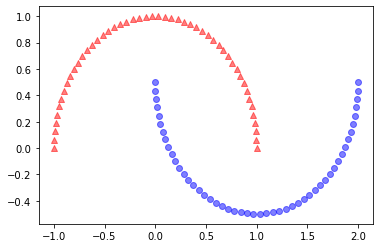

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 
X, Y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[Y==0,0], X[Y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[Y==1,0], X[Y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

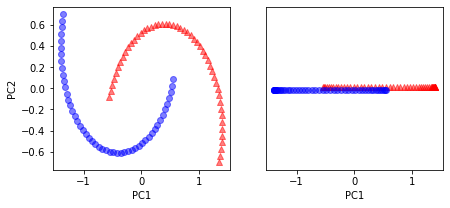

In [5]:
#尝试通过标准的PCA把数据集投射到主成分上
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[Y==0,0], X_spca[Y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[Y==1,0], X_spca[Y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[Y==0,0], np.zeros((50,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[Y==1,0], np.zeros((50,1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

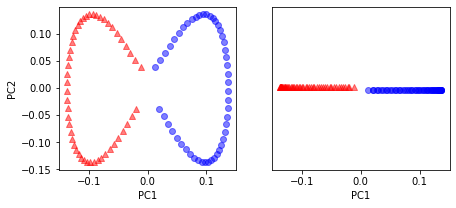

In [6]:
#使用核主成分分析函数rbf_kernel_pca

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[Y==0,0], X_kpca[Y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[Y==1,0], X_kpca[Y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[Y==0,0], np.zeros((50,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[Y==1,0], np.zeros((50,1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

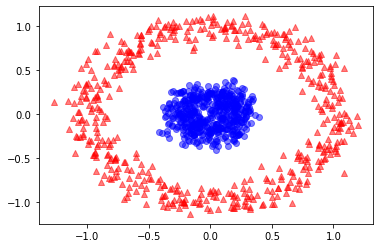

In [7]:
#分离同心圆案例

from sklearn.datasets import make_circles
X, Y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[Y==0,0], X[Y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[Y==1,0], X[Y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

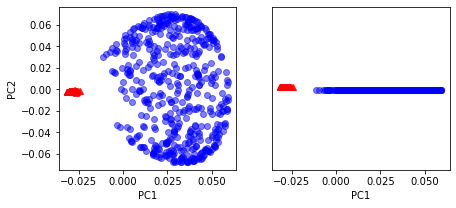

In [8]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[Y==0,0], X_kpca[Y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[Y==1,0], X_kpca[Y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[Y==0,0], np.zeros((500,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[Y==1,0], np.zeros((500,1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

In [9]:
#scikit-learn的核主成分分析

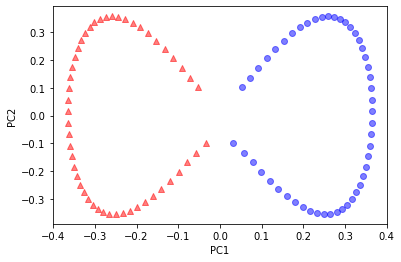

In [10]:
from sklearn.decomposition import KernelPCA

X, Y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)
plt.scatter(X_skernpca[Y==0,0], X_skernpca[Y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[Y==1,0], X_skernpca[Y==1,1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()